In [1]:
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor

In [2]:
# load and clean-up data
from numpy import nan
from numpy import isnan
from pandas import read_csv
from pandas import to_numeric

# fill missing values with a value at the same time one day ago
def fill_missing(values):
    one_day = 60 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if isnan(values[row, col]):
                values[row, col] = values[row - one_day, col]

# load all data
dataset = read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, 
                   infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
print("Input dataset already grouping date and time in datetime")
print(dataset.head())
# mark all missing values
dataset.replace('?', nan, inplace=True)
# make dataset numeric
dataset = dataset.astype('float32')
# fill missing
fill_missing(dataset.values)
# add a column for for the remainder of sub metering
values = dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])
# save updated dataset
dataset.to_csv('household_power_consumption.csv')
print("Dataset after fill missing values and add sub_metering_4 column.")
print(dataset.head())

Input dataset already grouping date and time in datetime
                    Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006

In [3]:
# This framing of the dataset also suggests that it would be useful to downsample the per-minute observations of 
# power consumption to daily totals. This is not required, but makes sense, given that we are interested in total 
# power per day.

# resample minute data to total for each day
from pandas import read_csv
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, 
                   parse_dates=['datetime'], index_col=['datetime'])
# resample data to daily
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()
# summarize
print(daily_data.shape)
# save
daily_data.to_csv('household_power_consumption_days.csv')
print("Data per day - after grouping them and sum it.")
daily_data.head()

(1442, 8)
Data per day - after grouping them and sum it.


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011


In [4]:
train, test = daily_data.values[1:-328], daily_data.values[-328:-6]

train = array(split(train, len(train)/7))
test = array(split(test, len(test)/7))

In [5]:
train.shape

(159, 7, 8)

Defined 10 models
new model
--- 0
[[2183.618 2195.452 2094.098 2047.968 2451.11  2211.892 1224.252]]
1784.9729088795411
--- 1
[[2195.452      2094.098      2047.968      2451.11       2211.892
  1224.252      1784.97290888]]
2009.6447900360495
--- 2
[[2094.098      2047.968      2451.11       2211.892      1224.252
  1784.97290888 2009.64479004]]
1815.8503367451488
--- 3
[[2047.968      2451.11       2211.892      1224.252      1784.97290888
  2009.64479004 1815.85033675]]
1790.7608468160295
--- 4
[[2451.11       2211.892      1224.252      1784.97290888 2009.64479004
  1815.85033675 1790.76084682]]
2015.599683684243
--- 5
[[2211.892      1224.252      1784.97290888 2009.64479004 1815.85033675
  1790.76084682 2015.59968368]]
1870.523887538264
--- 6
[[1224.252      1784.97290888 2009.64479004 1815.85033675 1790.76084682
  2015.59968368 1870.52388754]]
1669.8209158773523
new model
--- 0
[[1309.268 2083.454 1604.132 2219.78  1777.18  1769.442 1797.208]]
1784.8114511833564
--- 1
[[2083.454

--- 5
[[533.476      524.746      670.27810495 708.35891429 730.52372035
  767.19775288 791.07374647]]
794.3259851067977
--- 6
[[524.746      670.27810495 708.35891429 730.52372035 767.19775288
  791.07374647 794.32598511]]
817.7091701704948
new model
--- 0
[[527.476 528.46  535.064 544.758 542.002 529.698 534.294]]
654.7522850881854
--- 1
[[528.46       535.064      544.758      542.002      529.698
  534.294      654.75228509]]
696.7792921228553
--- 2
[[535.064      544.758      542.002      529.698      534.294
  654.75228509 696.77929212]]
713.1603774825624
--- 3
[[544.758      542.002      529.698      534.294      654.75228509
  696.77929212 713.16037748]]
743.4875652371641
--- 4
[[542.002      529.698      534.294      654.75228509 696.77929212
  713.16037748 743.48756524]]
773.7574310908388
--- 5
[[529.698      534.294      654.75228509 696.77929212 713.16037748
  743.48756524 773.75743109]]
781.9682082428974
--- 6
[[534.294      654.75228509 696.77929212 713.16037748 743.48756

--- 4
[[1579.914      1460.904      1180.536      1449.23913105 1500.26221551
  1516.37090725 1539.57871337]]
1539.4828979698052
--- 5
[[1460.904      1180.536      1449.23913105 1500.26221551 1516.37090725
  1539.57871337 1539.48289797]]
1490.820159266013
--- 6
[[1180.536      1449.23913105 1500.26221551 1516.37090725 1539.57871337
  1539.48289797 1490.82015927]]
1458.0637980442582
new model
--- 0
[[1518.418 1542.742 1082.716 1250.94   867.858 1103.724 1118.628]]
1262.9343711627848
--- 1
[[1542.742      1082.716      1250.94        867.858      1103.724
  1118.628      1262.93437116]]
1267.8405749063434
--- 2
[[1082.716      1250.94        867.858      1103.724      1118.628
  1262.93437116 1267.84057491]]
1249.2976055257961
--- 3
[[1250.94        867.858      1103.724      1118.628      1262.93437116
  1267.84057491 1249.29760553]]
1251.9979838695024
--- 4
[[ 867.858      1103.724      1118.628      1262.93437116 1267.84057491
  1249.29760553 1251.99798387]]
1227.8779971097697
--- 5


new model
--- 0
[[1350.486 1350.486 1350.486 1403.748 1684.426 1248.278 1504.82 ]]
1494.5084602912996
--- 1
[[1350.486      1350.486      1403.748      1684.426      1248.278
  1504.82       1494.50846029]]
1438.6597206042952
--- 2
[[1350.486      1403.748      1684.426      1248.278      1504.82
  1494.50846029 1438.6597206 ]]
1422.4019523623188
--- 3
[[1403.748      1684.426      1248.278      1504.82       1494.50846029
  1438.6597206  1422.40195236]]
1484.594288671543
--- 4
[[1684.426      1248.278      1504.82       1494.50846029 1438.6597206
  1422.40195236 1484.59428867]]
1496.3179869260528
--- 5
[[1248.278      1504.82       1494.50846029 1438.6597206  1422.40195236
  1484.59428867 1496.31798693]]
1442.1704280735826
--- 6
[[1504.82       1494.50846029 1438.6597206  1422.40195236 1484.59428867
  1496.31798693 1442.17042807]]
1476.9863445314622
new model
--- 0
[[1923.254 1830.684 1775.96  1854.624 1315.456 1809.954 1510.456]]
1606.1714205022402
--- 1
[[1830.684     1775.96      1

--- 0
[[1670.584 1781.146 1618.59  1822.162 1994.752 1679.884 1651.284]]
1741.3691467183744
--- 1
[[1781.146      1618.59       1822.162      1994.752      1679.884
  1651.284      1741.36914672]]
1724.6923353606692
--- 2
[[1618.59       1822.162      1994.752      1679.884      1651.284
  1741.36914672 1724.69233536]]
1662.3976272867121
--- 3
[[1822.162      1994.752      1679.884      1651.284      1741.36914672
  1724.69233536 1662.39762729]]
1727.2273752002652
--- 4
[[1994.752      1679.884      1651.284      1741.36914672 1724.69233536
  1662.39762729 1727.2273752 ]]
1750.431300657265
--- 5
[[1679.884      1651.284      1741.36914672 1724.69233536 1662.39762729
  1727.2273752  1750.43130066]]
1684.4143907195973
--- 6
[[1651.284      1741.36914672 1724.69233536 1662.39762729 1727.2273752
  1750.43130066 1684.41439072]]
1672.7309412899906
new model
--- 0
[[1847.97  1798.214 1622.738 1906.454 1923.802 1687.44  1648.622]]
1769.8928261618746
--- 1
[[1798.214      1622.738      1906.454

new model
--- 0
[[1247.946  919.6   1682.832 1111.376 1510.394 1449.862 1327.992]]
1283.2289819426
--- 1
[[ 919.6        1682.832      1111.376      1510.394      1449.862
  1327.992      1283.22898194]]
1364.9553670469652
--- 2
[[1682.832      1111.376      1510.394      1449.862      1327.992
  1283.22898194 1364.95536705]]
1407.859046506745
--- 3
[[1111.376      1510.394      1449.862      1327.992      1283.22898194
  1364.95536705 1407.85904651]]
1352.1296852367464
--- 4
[[1510.394      1449.862      1327.992      1283.22898194 1364.95536705
  1407.85904651 1352.12968524]]
1411.3891591969168
--- 5
[[1449.862      1327.992      1283.22898194 1364.95536705 1407.85904651
  1352.12968524 1411.3891592 ]]
1426.2126972165702
--- 6
[[1327.992      1283.22898194 1364.95536705 1407.85904651 1352.12968524
  1411.3891592  1426.21269722]]
1396.473710333044
new model
--- 0
[[1350.486 1350.486 1350.486 1403.748 1684.426 1248.278 1504.82 ]]
1491.0030164851937
--- 1
[[1350.486      1350.486      1

  1645.424      1603.37111474]]
1619.4653637693727
--- 2
[[2557.098      1760.112      1822.632      1951.09       1645.424
  1603.37111474 1619.46536377]]
1625.5344160276131
--- 3
[[1760.112      1822.632      1951.09       1645.424      1603.37111474
  1619.46536377 1625.53441603]]
1608.4210125053305
--- 4
[[1822.632      1951.09       1645.424      1603.37111474 1619.46536377
  1625.53441603 1608.42101251]]
1606.8340296698345
--- 5
[[1951.09       1645.424      1603.37111474 1619.46536377 1625.53441603
  1608.42101251 1606.83402967]]
1603.9222976167728
--- 6
[[1645.424      1603.37111474 1619.46536377 1625.53441603 1608.42101251
  1606.83402967 1603.92229762]]
1597.7589073032207
new model
--- 0
[[2383.01  1566.714 1791.85  1542.65  2009.13  1562.682 1663.384]]
1618.9919436310508
--- 1
[[1566.714      1791.85       1542.65       2009.13       1562.682
  1663.384      1618.99194363]]
1605.4784486660167
--- 2
[[1791.85       1542.65       2009.13       1562.682      1663.384
  1618.991

new model
--- 0
[[1463.31  1612.092 1076.32  1430.678  986.094 1339.738 1497.608]]
1535.3583520815546
--- 1
[[1612.092      1076.32       1430.678       986.094      1339.738
  1497.608      1535.35835208]]
1536.2367050644668
--- 2
[[1076.32       1430.678       986.094      1339.738      1497.608
  1535.35835208 1536.23670506]]
1535.6113369637078
--- 3
[[1430.678       986.094      1339.738      1497.608      1535.35835208
  1536.23670506 1535.61133696]]
1542.844021012133
--- 4
[[ 986.094      1339.738      1497.608      1535.35835208 1536.23670506
  1535.61133696 1542.84402101]]
1543.325010561958
--- 5
[[1339.738      1497.608      1535.35835208 1536.23670506 1535.61133696
  1542.84402101 1543.32501056]]
1552.408643977203
--- 6
[[1497.608      1535.35835208 1536.23670506 1535.61133696 1542.84402101
  1543.32501056 1552.40864398]]
1556.00454277926
new model
--- 0
[[1247.946  919.6   1682.832 1111.376 1510.394 1449.862 1327.992]]
1530.192398038933
--- 1
[[ 919.6        1682.832      11

new model
--- 0
[[2150.112 1906.556 1881.098 2433.508 2351.728 2137.856 1790.626]]
2006.6656545223009
--- 1
[[1906.556      1881.098      2433.508      2351.728      2137.856
  1790.626      2006.66565452]]
1935.194377671608
--- 2
[[1881.098      2433.508      2351.728      2137.856      1790.626
  2006.66565452 1935.19437767]]
1879.1762109181602
--- 3
[[2433.508      2351.728      2137.856      1790.626      2006.66565452
  1935.19437767 1879.17621092]]
1969.1418764512068
--- 4
[[2351.728      2137.856      1790.626      2006.66565452 1935.19437767
  1879.17621092 1969.14187645]]
1992.774403451059
--- 5
[[2137.856      1790.626      2006.66565452 1935.19437767 1879.17621092
  1969.14187645 1992.77440345]]
1893.1102168852883
--- 6
[[1790.626      2006.66565452 1935.19437767 1879.17621092 1969.14187645
  1992.77440345 1893.11021689]]
1826.681950020282
new model
--- 0
[[2610.33  2269.42  1930.51  2067.564 2760.902 2110.234 2092.99 ]]
2255.4916936183995
--- 1
[[2269.42       1930.51      

  1562.062      1490.40222905]]
1581.5421351572916
--- 2
[[1439.426      1512.704      1660.364      1872.178      1562.062
  1490.40222905 1581.54213516]]
1545.3442353190276
--- 3
[[1512.704      1660.364      1872.178      1562.062      1490.40222905
  1581.54213516 1545.34423532]]
1497.6971290014512
--- 4
[[1660.364      1872.178      1562.062      1490.40222905 1581.54213516
  1545.34423532 1497.697129  ]]
1554.9014598047702
--- 5
[[1872.178      1562.062      1490.40222905 1581.54213516 1545.34423532
  1497.697129   1554.9014598 ]]
1594.5258543805649
--- 6
[[1562.062      1490.40222905 1581.54213516 1545.34423532 1497.697129
  1554.9014598  1594.52585438]]
1521.7159657353218
new model
--- 0
[[1557.712 1476.106 1708.594 1833.628 1579.914 1460.904 1180.536]]
1436.9914156017346
--- 1
[[1476.106     1708.594     1833.628     1579.914     1460.904
  1180.536     1436.9914156]]
1450.5704775040697
--- 2
[[1708.594     1833.628     1579.914     1460.904     1180.536
  1436.9914156 1450.57

  1083.478      1103.37786886]]
1206.7963942468089
--- 2
[[1113.99       1005.934       834.788      1212.652      1083.478
  1103.37786886 1206.79639425]]
1176.4867599154961
--- 3
[[1005.934       834.788      1212.652      1083.478      1103.37786886
  1206.79639425 1176.48675992]]
1100.6845315494547
--- 4
[[ 834.788      1212.652      1083.478      1103.37786886 1206.79639425
  1176.48675992 1100.68453155]]
1102.618402869997
--- 5
[[1212.652      1083.478      1103.37786886 1206.79639425 1176.48675992
  1100.68453155 1102.61840287]]
1173.6009878882835
--- 6
[[1083.478      1103.37786886 1206.79639425 1176.48675992 1100.68453155
  1102.61840287 1173.60098789]]
1148.0964953046698
new model
--- 0
[[1154.504 1193.572 1109.574 1382.114 1409.472 1634.358  820.056]]
1161.0572676551053
--- 1
[[1193.572      1109.574      1382.114      1409.472      1634.358
   820.056      1161.05726766]]
1278.2985784166451
--- 2
[[1109.574      1382.114      1409.472      1634.358       820.056
  1161.0572

new model
--- 0
[[1611.78  1998.904 1622.59  1579.692 2073.886 2135.122 1596.324]]
1703.6108607206766
--- 1
[[1998.904      1622.59       1579.692      2073.886      2135.122
  1596.324      1703.61086072]]
1835.684058217046
--- 2
[[1622.59       1579.692      2073.886      2135.122      1596.324
  1703.61086072 1835.68405822]]
1686.0603680290333
--- 3
[[1579.692      2073.886      2135.122      1596.324      1703.61086072
  1835.68405822 1686.06036803]]
1628.0724964685774
--- 4
[[2073.886      2135.122      1596.324      1703.61086072 1835.68405822
  1686.06036803 1628.07249647]]
1771.1682972008225
--- 5
[[2135.122      1596.324      1703.61086072 1835.68405822 1686.06036803
  1628.07249647 1771.1682972 ]]
1763.692305576891
--- 6
[[1596.324      1703.61086072 1835.68405822 1686.06036803 1628.07249647
  1771.1682972  1763.69230558]]
1634.7822047432783
new model
--- 0
[[1000.014 1047.382 2713.884 1925.978 1727.964 1355.198 1668.892]]
1428.9036478550297
--- 1
[[1047.382      2713.884    

--- 0
[[ 921.668 1130.41   884.15   952.36   862.654  549.104  551.26 ]]
889.4858250722127
--- 1
[[1130.41        884.15        952.36        862.654       549.104
   551.26        889.48582507]]
948.501339304069
--- 2
[[884.15       952.36       862.654      549.104      551.26
  889.48582507 948.5013393 ]]
903.1538014523384
--- 3
[[952.36       862.654      549.104      551.26       889.48582507
  948.5013393  903.15380145]]
971.6129040541206
--- 4
[[862.654      549.104      551.26       889.48582507 948.5013393
  903.15380145 971.61290405]]
993.02517864632
--- 5
[[549.104      551.26       889.48582507 948.5013393  903.15380145
  971.61290405 993.02517865]]
919.0526517320252
--- 6
[[551.26       889.48582507 948.5013393  903.15380145 971.61290405
  993.02517865 919.05265173]]
935.4770275544936
new model
--- 0
[[554.616 555.664 549.482 615.212 543.356 533.476 524.746]]
670.2781049511366
--- 1
[[555.664      549.482      615.212      543.356      533.476
  524.746      670.27810495]]

--- 1
[[1476.43       1383.18       1191.082      1293.298      2555.146
  1736.088      1618.01893513]]
1707.5811429946475
--- 2
[[1383.18       1191.082      1293.298      2555.146      1736.088
  1618.01893513 1707.58114299]]
1701.0101752424398
--- 3
[[1191.082      1293.298      2555.146      1736.088      1618.01893513
  1707.58114299 1701.01017524]]
1485.082835344454
--- 4
[[1293.298      2555.146      1736.088      1618.01893513 1707.58114299
  1701.01017524 1485.08283534]]
1626.71520649294
--- 5
[[2555.146      1736.088      1618.01893513 1707.58114299 1701.01017524
  1485.08283534 1626.71520649]]
1805.9523270588147
--- 6
[[1736.088      1618.01893513 1707.58114299 1701.01017524 1485.08283534
  1626.71520649 1805.95232706]]
1676.9741404517881
new model
--- 0
[[1805.408 1673.816 1825.54  2022.098 1946.534 1773.592 1836.822]]
1816.8970442376906
--- 1
[[1673.816      1825.54       2022.098      1946.534      1773.592
  1836.822      1816.89704424]]
1754.718706925396
--- 2
[[1825.5

new model
--- 0
[[2095.772 1487.556 1341.332 1198.626 1387.884 1323.342 1398.164]]
1538.336991854313
--- 1
[[1487.556      1341.332      1198.626      1387.884      1323.342
  1398.164      1538.33699185]]
1480.6240298120595
--- 2
[[1341.332      1198.626      1387.884      1323.342      1398.164
  1538.33699185 1480.62402981]]
1437.0340433819647
--- 3
[[1198.626      1387.884      1323.342      1398.164      1538.33699185
  1480.62402981 1437.03404338]]
1441.4363890705658
--- 4
[[1387.884      1323.342      1398.164      1538.33699185 1480.62402981
  1437.03404338 1441.43638907]]
1469.5982754329666
--- 5
[[1323.342      1398.164      1538.33699185 1480.62402981 1437.03404338
  1441.43638907 1469.59827543]]
1461.8928268091486
--- 6
[[1398.164      1538.33699185 1480.62402981 1437.03404338 1441.43638907
  1469.59827543 1461.89282681]]
1478.0079375568214
new model
--- 0
[[2049.808 1665.7   1340.462 1268.964  980.898 1394.186 1420.554]]
1491.1237837723147
--- 1
[[1665.7        1340.462   

--- 1
[[1830.684      1775.96       1854.624      1315.456      1809.954
  1510.456      1597.92911345]]
1650.127984745375
--- 2
[[1775.96       1854.624      1315.456      1809.954      1510.456
  1597.92911345 1650.12798475]]
1650.0105222237314
--- 3
[[1854.624      1315.456      1809.954      1510.456      1597.92911345
  1650.12798475 1650.01052222]]
1619.1625069631543
--- 4
[[1315.456      1809.954      1510.456      1597.92911345 1650.12798475
  1650.01052222 1619.16250696]]
1571.8355657417696
--- 5
[[1809.954      1510.456      1597.92911345 1650.12798475 1650.01052222
  1619.16250696 1571.83556574]]
1618.2144382044764
--- 6
[[1510.456      1597.92911345 1650.12798475 1650.01052222 1619.16250696
  1571.83556574 1618.2144382 ]]
1586.7514348931022
new model
--- 0
[[1611.78  1998.904 1622.59  1579.692 2073.886 2135.122 1596.324]]
1691.208492121715
--- 1
[[1998.904      1622.59       1579.692      2073.886      2135.122
  1596.324      1691.20849212]]
1803.1095452454495
--- 2
[[1622

   962.2585489   938.04408068]]
1027.587154885026
new model
--- 0
[[ 794.712 1372.472 2557.098 1760.112 1822.632 1951.09  1645.424]]
1479.7582765276366
--- 1
[[1372.472      2557.098      1760.112      1822.632      1951.09
  1645.424      1479.75827653]]
1678.8822094205802
--- 2
[[2557.098      1760.112      1822.632      1951.09       1645.424
  1479.75827653 1678.88220942]]
1829.8818248328944
--- 3
[[1760.112      1822.632      1951.09       1645.424      1479.75827653
  1678.88220942 1829.88182483]]
1659.1917491503164
--- 4
[[1822.632      1951.09       1645.424      1479.75827653 1678.88220942
  1829.88182483 1659.19174915]]
1668.3412310236672
--- 5
[[1951.09       1645.424      1479.75827653 1678.88220942 1829.88182483
  1659.19174915 1668.34123102]]
1707.511027021374
--- 6
[[1645.424      1479.75827653 1678.88220942 1829.88182483 1659.19174915
  1668.34123102 1707.51102702]]
1632.737903957312
new model
--- 0
[[2383.01  1566.714 1791.85  1542.65  2009.13  1562.682 1663.384]]
1770

new model
--- 0
[[527.476 528.46  535.064 544.758 542.002 529.698 534.294]]
547.4834263910786
--- 1
[[528.46       535.064      544.758      542.002      529.698
  534.294      547.48342639]]
549.2415062778823
--- 2
[[535.064      544.758      542.002      529.698      534.294
  547.48342639 549.24150628]]
552.1689912288746
--- 3
[[544.758      542.002      529.698      534.294      547.48342639
  549.24150628 552.16899123]]
558.0505731539408
--- 4
[[542.002      529.698      534.294      547.48342639 549.24150628
  552.16899123 558.05057315]]
560.0191747956409
--- 5
[[529.698      534.294      547.48342639 549.24150628 552.16899123
  558.05057315 560.0191748 ]]
559.3773930922357
--- 6
[[534.294      547.48342639 549.24150628 552.16899123 558.05057315
  560.0191748  559.37739309]]
563.0797442182998
new model
--- 0
[[ 554.27  1055.986 1129.73  1218.222 1218.222 1218.222 1218.222]]
1072.9969383057946
--- 1
[[1055.986      1129.73       1218.222      1218.222      1218.222
  1218.222     

new model
--- 0
[[1309.268 2083.454 1604.132 2219.78  1777.18  1769.442 1797.208]]
1553.3304492155921
--- 1
[[2083.454      1604.132      2219.78       1777.18       1769.442
  1797.208      1553.33044922]]
1554.5799365445964
--- 2
[[1604.132      2219.78       1777.18       1769.442      1797.208
  1553.33044922 1554.57993654]]
1450.5417464882453
--- 3
[[2219.78       1777.18       1769.442      1797.208      1553.33044922
  1554.57993654 1450.54174649]]
1580.935811621012
--- 4
[[1777.18       1769.442      1797.208      1553.33044922 1554.57993654
  1450.54174649 1580.93581162]]
1499.0333925826135
--- 5
[[1769.442      1797.208      1553.33044922 1554.57993654 1450.54174649
  1580.93581162 1499.03339258]]
1469.1204684422105
--- 6
[[1797.208      1553.33044922 1554.57993654 1450.54174649 1580.93581162
  1499.03339258 1469.12046844]]
1384.64221764483
new model
--- 0
[[2336.9   2508.466 1518.684 1995.796 1995.796 2116.224 2196.76 ]]
2288.8134689598837
--- 1
[[2508.466      1518.684     

new model
--- 0
[[1847.97  1798.214 1622.738 1906.454 1923.802 1687.44  1648.622]]
1615.7633530958929
--- 1
[[1798.214     1622.738     1906.454     1923.802     1687.44
  1648.622     1615.7633531]]
1618.1637638110008
--- 2
[[1622.738      1906.454      1923.802      1687.44       1648.622
  1615.7633531  1618.16376381]]
1611.3221549369791
--- 3
[[1906.454      1923.802      1687.44       1648.622      1615.7633531
  1618.16376381 1611.32215494]]
1542.2578727007296
--- 4
[[1923.802      1687.44       1648.622      1615.7633531  1618.16376381
  1611.32215494 1542.2578727 ]]
1507.728925837545
--- 5
[[1687.44       1648.622      1615.7633531  1618.16376381 1611.32215494
  1542.2578727  1507.72892584]]
1479.850761866584
--- 6
[[1648.622      1615.7633531  1618.16376381 1611.32215494 1542.2578727
  1507.72892584 1479.85076187]]
1452.064454737204
new model
--- 0
[[1805.278 1690.388 1118.82  1825.852 1596.982 1649.22  1233.35 ]]
1635.8258507083895
--- 1
[[1690.388      1118.82       1825.852

new model
--- 0
[[1416.22  1672.55  1660.89  1520.588 1442.064 1095.78  1099.438]]
1188.8088025913698
--- 1
[[1672.55       1660.89       1520.588      1442.064      1095.78
  1099.438      1188.80880259]]
1278.6683901083338
--- 2
[[1660.89       1520.588      1442.064      1095.78       1099.438
  1188.80880259 1278.66839011]]
1249.5221316233317
--- 3
[[1520.588      1442.064      1095.78       1099.438      1188.80880259
  1278.66839011 1249.52213162]]
1213.0543293508194
--- 4
[[1442.064      1095.78       1099.438      1188.80880259 1278.66839011
  1249.52213162 1213.05432935]]
1144.6299709951918
--- 5
[[1095.78       1099.438      1188.80880259 1278.66839011 1249.52213162
  1213.05432935 1144.629971  ]]
1052.3813783032365
--- 6
[[1099.438      1188.80880259 1278.66839011 1249.52213162 1213.05432935
  1144.629971   1052.3813783 ]]
1009.6279720160339
new model
--- 0
[[ 981.62  1139.964 1471.34  1368.808 1384.136 1349.002 1140.928]]
1186.425659331431
--- 1
[[1139.964      1471.34     

new model
--- 0
[[1743.84  1323.018 1422.876 1451.854 1303.812 1238.714 1328.108]]
1349.0661155711919
--- 1
[[1323.018      1422.876      1451.854      1303.812      1238.714
  1328.108      1349.06611557]]
1294.4583740559488
--- 2
[[1422.876      1451.854      1303.812      1238.714      1328.108
  1349.06611557 1294.45837406]]
1284.1030981816896
--- 3
[[1451.854      1303.812      1238.714      1328.108      1349.06611557
  1294.45837406 1284.10309818]]
1344.8969015080165
--- 4
[[1303.812      1238.714      1328.108      1349.06611557 1294.45837406
  1284.10309818 1344.89690151]]
1351.7041444028114
--- 5
[[1238.714      1328.108      1349.06611557 1294.45837406 1284.10309818
  1344.89690151 1351.7041444 ]]
1327.5126576000157
--- 6
[[1328.108      1349.06611557 1294.45837406 1284.10309818 1344.89690151
  1351.7041444  1327.5126576 ]]
1328.2017272217136
new model
--- 0
[[1463.31  1612.092 1076.32  1430.678  986.094 1339.738 1497.608]]
1249.1060671169962
--- 1
[[1612.092      1076.32   

new model
--- 0
[[1309.268 2083.454 1604.132 2219.78  1777.18  1769.442 1797.208]]
1758.2603840931065
--- 1
[[2083.454      1604.132      2219.78       1777.18       1769.442
  1797.208      1758.26038409]]
1761.161355656597
--- 2
[[1604.132      2219.78       1777.18       1769.442      1797.208
  1758.26038409 1761.16135566]]
1756.2624829805097
--- 3
[[2219.78       1777.18       1769.442      1797.208      1758.26038409
  1761.16135566 1756.26248298]]
1818.8624718294564
--- 4
[[1777.18       1769.442      1797.208      1758.26038409 1761.16135566
  1756.26248298 1818.86247183]]
1750.316731295793
--- 5
[[1769.442      1797.208      1758.26038409 1761.16135566 1756.26248298
  1818.86247183 1750.3167313 ]]
1734.822575246067
--- 6
[[1797.208      1758.26038409 1761.16135566 1756.26248298 1818.86247183
  1750.3167313  1734.82257525]]
1737.883215192627
new model
--- 0
[[2336.9   2508.466 1518.684 1995.796 1995.796 2116.224 2196.76 ]]
2137.911346986126
--- 1
[[2508.466      1518.684      1

new model
--- 0
[[1190.208 1603.334 1439.426 1512.704 1660.364 1872.178 1562.062]]
1527.625406166235
--- 1
[[1603.334      1439.426      1512.704      1660.364      1872.178
  1562.062      1527.62540617]]
1608.7983426836913
--- 2
[[1439.426      1512.704      1660.364      1872.178      1562.062
  1527.62540617 1608.79834268]]
1584.0161515337543
--- 3
[[1512.704      1660.364      1872.178      1562.062      1527.62540617
  1608.79834268 1584.01615153]]
1559.6395208957483
--- 4
[[1660.364      1872.178      1562.062      1527.62540617 1608.79834268
  1584.01615153 1559.6395209 ]]
1612.0184412288334
--- 5
[[1872.178      1562.062      1527.62540617 1608.79834268 1584.01615153
  1559.6395209  1612.01844123]]
1639.23696849668
--- 6
[[1562.062      1527.62540617 1608.79834268 1584.01615153 1559.6395209
  1612.01844123 1639.2369685 ]]
1583.6574258445291
new model
--- 0
[[1557.712 1476.106 1708.594 1833.628 1579.914 1460.904 1180.536]]
1473.395655663549
--- 1
[[1476.106      1708.594      1

new model
--- 0
[[1154.504 1193.572 1109.574 1382.114 1409.472 1634.358  820.056]]
1203.508574861329
--- 1
[[1193.572      1109.574      1382.114      1409.472      1634.358
   820.056      1203.50857486]]
1312.1687658344933
--- 2
[[1109.574      1382.114      1409.472      1634.358       820.056
  1203.50857486 1312.16876583]]
1270.2535832366373
--- 3
[[1382.114      1409.472      1634.358       820.056      1203.50857486
  1312.16876583 1270.25358324]]
1269.2325724051962
--- 4
[[1409.472      1634.358       820.056      1203.50857486 1312.16876583
  1270.25358324 1269.23257241]]
1379.650418535687
--- 5
[[1634.358       820.056      1203.50857486 1312.16876583 1270.25358324
  1269.23257241 1379.65041854]]
1370.1120754999124
--- 6
[[ 820.056      1203.50857486 1312.16876583 1270.25358324 1269.23257241
  1379.65041854 1370.1120755 ]]
1253.4212376655544
new model
--- 0
[[ 806.352  812.038  801.158  855.824 1064.166 1164.446 1176.158]]
1074.347203081331
--- 1
[[ 812.038       801.158     

new model
--- 0
[[1611.78  1998.904 1622.59  1579.692 2073.886 2135.122 1596.324]]
1727.880000019816
--- 1
[[1998.904      1622.59       1579.692      2073.886      2135.122
  1596.324      1727.88000002]]
1843.0018669065441
--- 2
[[1622.59       1579.692      2073.886      2135.122      1596.324
  1727.88000002 1843.00186691]]
1722.793842726914
--- 3
[[1579.692      2073.886      2135.122      1596.324      1727.88000002
  1843.00186691 1722.79384273]]
1687.3428009284614
--- 4
[[2073.886      2135.122      1596.324      1727.88000002 1843.00186691
  1722.79384273 1687.34280093]]
1811.8596172048642
--- 5
[[2135.122      1596.324      1727.88000002 1843.00186691 1722.79384273
  1687.34280093 1811.8596172 ]]
1797.5657617868626
--- 6
[[1596.324      1727.88000002 1843.00186691 1722.79384273 1687.34280093
  1811.8596172  1797.56576179]]
1693.5697489399822
new model
--- 0
[[1000.014 1047.382 2713.884 1925.978 1727.964 1355.198 1668.892]]
1485.4160589840317
--- 1
[[1047.382      2713.884    

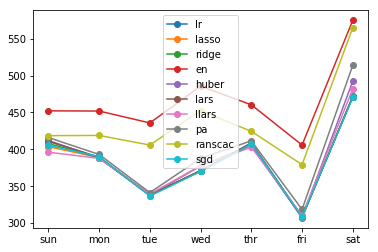

In [8]:
# recursive multi-step forecast with linear algorithms

# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into standard weeks
    train, test = data[1:-328], data[-328:-6] #test in only the last 328 days
    # restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores

# summarize scores
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))

# prepare a list of ml models
def get_models(models=dict()):
    # linear models
    models['lr'] = LinearRegression()
    models['lasso'] = Lasso()
    models['ridge'] = Ridge()
    models['en'] = ElasticNet()
    models['huber'] = HuberRegressor()
    models['lars'] = Lars()
    models['llars'] = LassoLars()
    models['pa'] = PassiveAggressiveRegressor(max_iter=1000, tol=1e-3)
    models['ranscac'] = RANSACRegressor()
    models['sgd'] = SGDRegressor(max_iter=1000, tol=1e-3)
    print('Defined %d models' % len(models))
    return models

# create a feature preparation pipeline for a model
def make_pipeline(model):
    steps = list()
    # standardization
    steps.append(('standardize', StandardScaler()))
    # normalization
    steps.append(('normalize', MinMaxScaler()))
    # the model
    steps.append(('model', model))
    # create pipeline
    pipeline = Pipeline(steps=steps)
    return pipeline

# make a recursive multi-step forecast
def forecast(model, input_x, n_input):
    yhat_sequence = list()
    input_data = [x for x in input_x]
    for j in range(7):
        # prepare the input data
        X = array(input_data[-n_input:]).reshape(1, n_input)
        # make a one-step forecast
        yhat = model.predict(X)[0]
        # add to the result
        yhat_sequence.append(yhat)
        # add the prediction to the input
        input_data.append(yhat)
#     print(yhat_sequence)
    return yhat_sequence

# convert windows of weekly multivariate data into a series of total power
def to_series(data):
    # extract just the total power from each week
    series = [week[:, 0] for week in data]
    # flatten into a single series
    series = array(series).flatten()
    return series

# convert history into inputs and outputs
def to_supervised(history, n_input):
    # convert history to a univariate series
    data = to_series(history)
    X, y = list(), list()
    ix_start = 0
    # step over the entire history one time step at a time
    for i in range(len(data)):
        # define the end of the input sequence
        ix_end = ix_start + n_input
        # ensure we have enough data for this instance
        if ix_end < len(data):
            X.append(data[ix_start:ix_end])
            y.append(data[ix_end])
        # move along one time step
        ix_start += 1
    return array(X), array(y)

# fit a model and make a forecast
def sklearn_predict(model, history, n_input):
    # prepare data
    train_x, train_y = to_supervised(history, n_input)
    # make pipeline
    pipeline = make_pipeline(model)
    # fit the model
    pipeline.fit(train_x, train_y)
    # predict the week, recursively
    yhat_sequence = forecast(pipeline, train_x[-1, :], n_input)
    return yhat_sequence

# evaluate a single model
def evaluate_model(model, train, test, n_input):
    # history is a list of weekly data
    history = [x for x in train]
    # walk-forward validation over each week
    predictions = list()
    for i in range(len(test)):
        # predict the week
        yhat_sequence = sklearn_predict(model, history, n_input)
        # store the predictions
        predictions.append(yhat_sequence)
        # get real observation and add to history for predicting the next week
        history.append(test[i, :])
    predictions = array(predictions)
    # evaluate predictions days for each week
    score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    return score, scores

# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, 
                   parse_dates=['datetime'], index_col=['datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# prepare the models to evaluate
models = get_models()
n_input = 7
# evaluate each model
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
for name, model in models.items():
    # evaluate and get scores
    score, scores = evaluate_model(model, train, test, n_input)
    # summarize scores
    summarize_scores(name, score, scores)
    # plot scores
    pyplot.plot(days, scores, marker='o', label=name)
# show plot
pyplot.legend()
pyplot.show()